# 합성곱 신경망
---

합성곱 신경망의 전체 그림

<img src = "../Data/합성곱신경망.png">

In [1]:
from tensorflow import keras

In [2]:
# h5 모델 불러오기
model = keras.models.load_model("../Data/best_cnn_model.h5")

2022-07-28 10:39:13.604794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# model의 layer 확인하기

model.layers

Convolutional.conv2d

<img src = "../Data/convolutional_conv2d.png" width =600>

### kernel size (3X3)로 구성된 이미지 보기

In [5]:
# 32개의 노드로 구성된 layer 선택

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
# 가중치(weight)값 보기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.018338172 0.25283182


In [7]:
conv_weights

array([[[[ 0.15961626,  0.17982742,  0.09360796, -0.00863037,
           0.15170601, -0.7402885 ,  0.06737743,  0.11864051,
           0.21002765, -0.09400906,  0.32506183,  0.14367698,
          -0.11057805, -0.20532972, -0.17150092, -0.0381934 ,
          -0.24339432,  0.07496916, -0.08883929, -0.0473005 ,
          -0.41395557, -0.18060853,  0.0379527 , -0.01289226,
          -0.18372202, -0.22041121, -0.18225108, -0.07309847,
          -0.35442632,  0.05912845,  0.07868536,  0.00311868]],

        [[-0.09841575,  0.15018032, -0.00600497,  0.17907499,
           0.16022651, -0.36989   ,  0.14853294, -0.13992496,
           0.40256286, -0.16466741, -0.17620637, -0.2469607 ,
           0.27289525, -1.8303336 , -0.3002636 , -0.03797501,
           0.17620398,  0.05331283,  0.26359713,  0.14344642,
           0.31219643, -0.12635559,  0.01171631,  0.01403628,
          -0.43704447,  0.08898875, -0.09450746, -0.05898875,
          -0.19817065,  0.06176293,  0.08572558,  0.0614665 ]],

  

In [8]:
import matplotlib.pyplot as plt

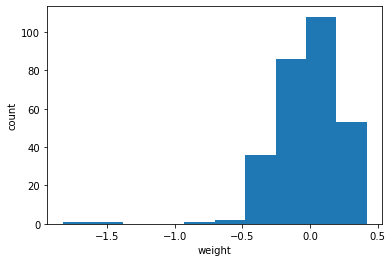

In [10]:
# 시각화 해보기

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

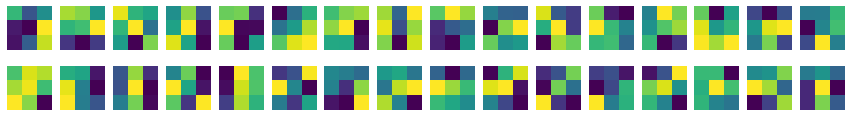

In [11]:
# 32개의 커널로 이루어진 이미지 확인하기
    # 2줄에 컬럼 16개
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i, j].axis('off')

plt.show()

> 아래는 위의 final 커널의 이미지 색상

<img src = "../Data/3_3필터커널.png" width =400>

---
## 특성맵 시각화

In [12]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [13]:
# Model 불러오기
    # activation은 함수형 모델이라는 뜻
conv_acti = keras.models.Model(model.input, model.layers[0].output)


In [14]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

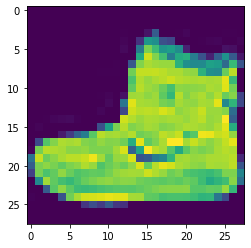

In [16]:
# 원래 데이터 특성맵
plt.imshow(train_input[0])
plt.show()

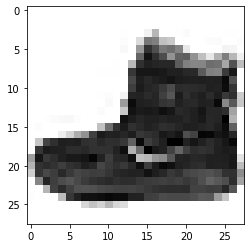

In [17]:
# 보기 편하게 cmap으로 필터링함
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [18]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 345ms/step
(1, 28, 28, 32)


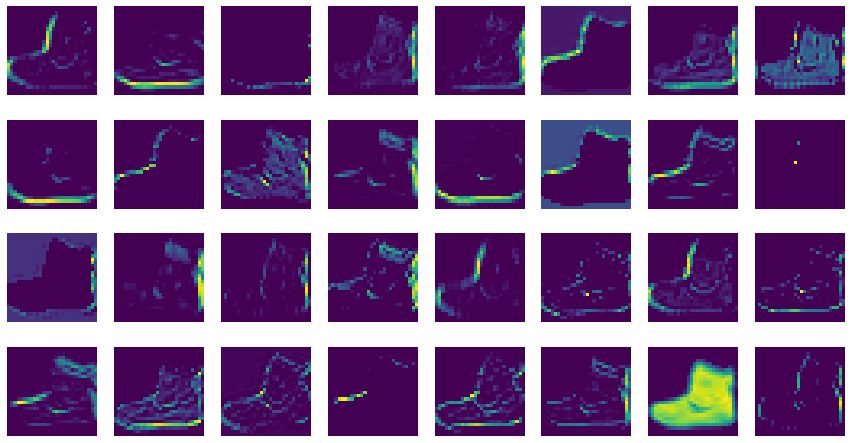

In [23]:
# 32개의 커널로 이루어진 이미지 확인하기
    # 4줄에 컬럼 8개
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')

plt.show()

> 아래는 위의 특성맵

<img src = "../Data/특성맵.png" width =400>

In [26]:
# Model 불러오기

conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [27]:
# 위의 featureㅡmaps의 소스코드를 하나로 합쳐서 쓴거임.
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/ 255.0)
print(feature_maps.shape)

1/1 [==============================] - 0s 112ms/step
(1, 14, 14, 64)


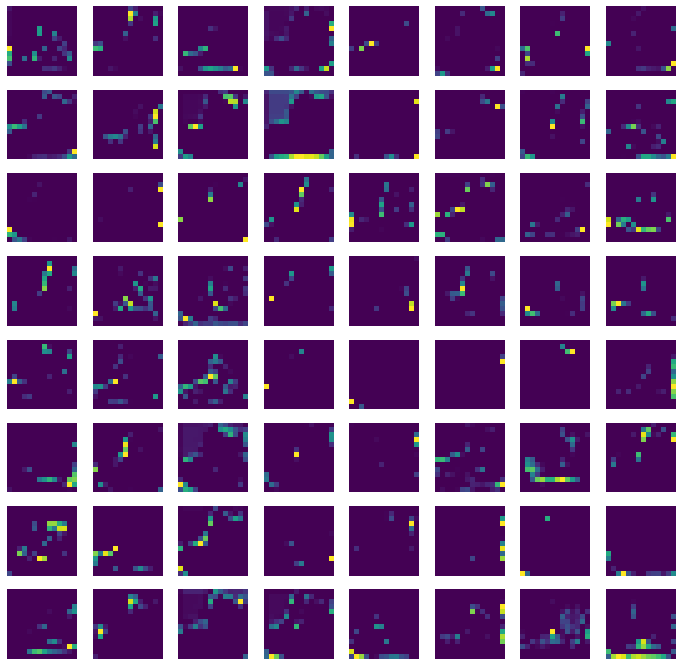

In [28]:
# 최대플링(max) 이미지 확인하기
    # 4줄에 컬럼 8개
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')

plt.show()

> 이 전체 그림을 다 준 것이 아니고 이 점으로 나와있는 색깔있는 데이터만 준 것이다.

> 이 것을 가지고 컴퓨터가 딥러닝을 한다.

> 실제 데이터 값 이미지
model.layers[2]  
<keras.layers.convolutional.conv2d.Conv2D at 0x7feb6f324490>,  
<keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7feb6f324fa0>
<img src = "../Data/maxpooling.png" width =400>